# OPTIONS AND DERRIVATIVES

# 1. Options

In [ ]:
# import all the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import random
import time
import scipy.stats as st

from numpy.random import randn
from scipy.optimize import fsolve
from yf import yf
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
help(yf)

Help on function yf in module yf:

yf(t1, t2)
    Measures the year fraction between dates t1 and t2>t1 according to the
    30/360 European day count convention.
    
    t1 is the tuple (dd,mm,yyyy), t2 is a list of tuples 
    [(dd,mm,yyyy),...,(dd,mm,yyyy)]. Tau = yf(t1,t2) is an array, where Tau[j] 
    is the corresponding year fraction between t1 and t2[j].
    
    Example
    t1 = (28,6,2017)
    t2 = [(5,10,2017),(5,1,2018),(5,4,2018)]
    
    Tau = yf(t1,t2)



**1.1 DAY-COUNT CONVENTION**

If $t_1=d_1/m_1/y_1$ and $t_2=d_2/m_2/y_2$ are two dates, then the year fraction between these dates is defined as 

\begin{equation*}
\frac{\min\{d_2,30\}-\min\{d_1,30\}}{360}+\frac{m_2-m_1}{12}+y_2-y_1\;.
\end{equation*}

In [ ]:
#t1 = 12/1/2015, t2 = 30/8/2018
yf((12,1,2015),[(30,8,2018)])[0]

**1.2 OUTPERFORMANCE CERTIFICAT**

plot of the profit diagram of the following outperformance product

- buy (long) one share of underlying with price $s = S_0 = 77.45$
- buy (long) one call option on the underlying with strike $X_1 = S_0$ and price $V_c(s,0;X_1) = 5.50$
- sell (short) two call options on the underlying each with strike $X_2 = 1.2S_0$ and price $V_c(s,0;X_2) = 1.20$

In [ ]:
#t1=11/09/2019 t2=20/12/2019

In [ ]:
#options parameter
#s = 77.45  underlying
#X1 = s # strike1
#X2 = 1.2*s # strike2

In [6]:
s = 77.45; X1 = s; X2 = 1.2*s; # underlying, strikes
prices = np.array([[5.5],[1.2]]) # the option prices 
n_long = 1; n_short = 2; # 'n_long' long call with strike X1, 'n_short' short call with strike X2

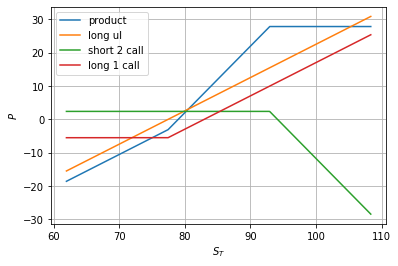

In [7]:
# draw the profit diagram of the outperformance product
V0 = s+n_long*prices[0]-n_short*prices[1]
profit = lambda x,X1,X2,V0: x+n_long*np.maximum(x-X1,0)-n_short*np.maximum(x-X2,0)-V0;
x = np.arange(0.8*s,1.4*s,0.1);
plt.plot(x,profit(x,X1,X2,V0)); plt.plot(x,x-s);
plt.plot(x,-n_short*np.maximum(x-X2,0)+n_short*prices[1]);
plt.plot(x,n_long*np.maximum(x-X1,0)-n_long*prices[0]);
plt.grid()
plt.legend(['product','long ul','short %i call' %n_short,'long %i call'%n_long])
plt.xlabel('$S_T$'), plt.ylabel('$P$');

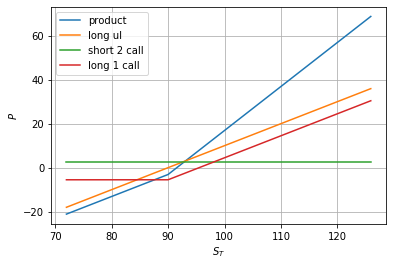

In [12]:
s = 90; X1 = s; X2 = 1.5*s; # underlying, strikes
prices = np.array([[5.5],[1.2]]) # the option prices 
n_long = 1; n_short = 2; # 'n_long' long call with strike X1, 'n_short' short call with strike X2

# draw the profit diagram of the outperformance product
V0 = s+n_long*prices[0]-n_short*prices[1]
profit = lambda x,X1,X2,V0: x+n_long*np.maximum(x-X1,0)-n_short*np.maximum(x-X2,0)-V0;
x = np.arange(0.8*s,1.4*s,0.1);
plt.plot(x,profit(x,X1,X2,V0)); plt.plot(x,x-s);
plt.plot(x,-n_short*np.maximum(x-X2,0)+n_short*prices[1]);
plt.plot(x,n_long*np.maximum(x-X1,0)-n_long*prices[0]);
plt.grid()
plt.legend(['product','long ul','short %i call' %n_short,'long %i call'%n_long])
plt.xlabel('$S_T$'), plt.ylabel('$P$');

eg:
    
$s_0$ is the price of the stock at issuance $t=0$. In this example $s_0=286.10$.

$T$ is the maturity of the product. In this example $T=358/360$.

$J$ is number of evenly spaced observation dates $t_j=j\frac{T}{J}$. In this example $J=252$.

$\sigma$ is the (annual, implied) volatility of the stock. In this example $\sigma=0.0753$.

$r$ is the continuously compounded risk free. In this example $r=-0.0063$.

$q$ is the continuously compounded dividend yield. In this example $q=0.0310$.

Simulate one path ..

In [9]:
# model- and contract parameters
s0 = 286.1 
T = 358/360 
J = 252 
sigma = 0.0753 
r = -0.0063 
q = 0.0310 

In [10]:
dt = T/J; tj = np.arange(dt,T+dt,dt); 
tj = np.reshape(np.asarray(tj),[J,1]); t = np.vstack((np.asarray([[0.0]]),tj))
Z = randn(1,J); X = np.cumsum(Z,axis=1)
s = s0*np.exp((r-q-0.5*sigma**2)*tj+sigma*np.sqrt(dt)*X.T) # the stock prices at tj, excluding s0
s = np.vstack((np.asarray(s0),s)) # the stock prices at tj, including s0

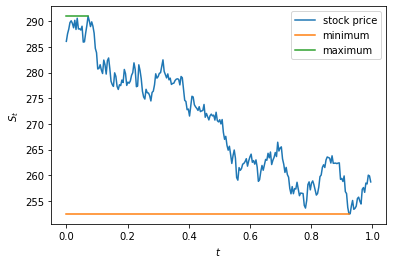

In [11]:
#and plot it. Furthermore, get the payoff  𝑔𝑘  of the product for this scenario
plt.plot(t,s)
plt.plot(np.array([0.0,t[s==np.min(s)]]),np.array([np.min(s),np.min(s)]))
plt.plot(np.array([0.0,t[s==np.max(s)]]),np.array([np.max(s),np.max(s)]))
plt.xlabel('$t$'); plt.ylabel('$S_t$');
plt.legend(('stock price','minimum','maximum'));
g = np.max(s)-np.min(s)
display(g)

To get an estimate of the value of the product, repeat the above  𝑛  times (without plotting).

In [ ]:
n = 5*10**4; v = np.zeros(n)
for j in range(0,n):
    Z = randn(1,J); X = np.cumsum(Z,axis=1)
    s = s0*np.exp((r-q-0.5*sigma**2)*tj+sigma*np.sqrt(dt)*X.T)
    s = np.vstack((np.asarray(s0),s))
    v[j] = np.max(s)-np.min(s) # the payoff

# average and discount
v = np.exp(-r*T)*np.mean(v); display(v)

### Example 1.2 

On September 3, 2019, the market price of a call option with strike $X=110$ CHF and with maturity November 15, 2019, on Nestle (which trades at $s_0=111.34$ CHF) is equal to $V^{\textrm M}=3.72$ CHF (average of bid and ask price). We use the bootstrap procedure described in the script to price this option without any model.

Load daily closing prices of Nestle from September 3, 2018, to September 2, 2019, and calculate the (daily) log-returns.

In [4]:
data_nesn = pd.read_excel(r'C:\Users\nherm\Downloads\Python [Jupiter Notebooks, Python functions]-20200915\nesn_03092018-02092019.xlsx', sheet_name='Tabelle1')

In [5]:
data_nesn

,Dates,Price
0,2018-09-03,81.50
1,2018-09-04,80.50
2,2018-09-05,79.90
3,2018-09-06,79.96
4,2018-09-07,80.24
...,...,...
244,2019-08-27,109.06
245,2019-08-28,109.28
246,2019-08-29,110.30
247,2019-08-30,111.00


In [6]:
P = data_nesn['Price']

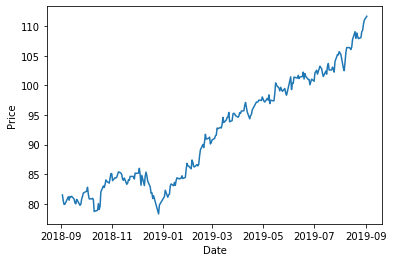

In [7]:
# look at the price history of Nestle
plt.plot(data_nesn['Dates'],P); plt.xlabel('Date'); plt.ylabel('Price');

In [8]:
R = np.log(np.asarray(P[1:])/np.asarray(P[0:-1]))

**Prepare for the bootstrap.**

In [ ]:
s0 = 111.34; X = 110; r = -0.0088; # inital fixing, strike of the call, risk-free
T = np.int(yf((3,9,2019),[(15,11,2019)])[0]*360) # number of days 'til expiry of the call
B = 5*10**6; ST = np.zeros(B) # number of bootstrap samples

In [ ]:
# bootstrap via for-loop
# note: np.random.randint(n,size=(1,T)) draws uniformly T integers from the set {0,1,..,n-1} with replacement
t = time.time()
for j in range(0,B):
    idx = np.random.randint(len(R),size=(1,T))
    ST[j] = s0*np.exp(np.sum(R[idx])) # the price of the underlying at expiry

V = np.exp(-r*T/360)*np.mean(np.maximum(ST-X,0)) # average the cash flows of the call at expiry and discount
elapsed = time.time() - t
V, elapsed

In [ ]:
# repeat the above, but without a for-loop: this is (much) faster, but requires (much) more memory ...
t = time.time()
idx = np.random.randint(len(R),size=(B,T))
ST = s0*np.exp(np.sum(R[idx],axis=1))
V = np.exp(-r*T/360)*np.mean(np.maximum(ST-X,0))
elapsed = time.time() - t
V, elapsed

The model-free price $V^B\approx 12.72$ is completely different from the market price! To see why, recall that the exponent $\sum_{k=1}^Tr_k^{c,\ast b}$ is - under the iid assumption and for $T$ large enough - normally distributed $\mathcal{N}(\mu,\sigma^2)$. Hence, estimate $\mu$ and $\sigma$ ...

In [ ]:
RT = np.sum(R[idx],axis=1); # the sum in the exponent
args_n = st.norm.fit(RT) # fit to a normal distribution to obtain mu and sigma
mu = args_n[0]; sigma = args_n[1]
mu, sigma

In [ ]:
# check graphically the normality
plt.hist(RT,bins=100,density=True);
x = np.arange(-0.3,0.4,0.001)
plt.plot(x,st.norm.pdf(x,*args_n));

We might also directly fit the final stock price  𝑠𝑇  to a lognormal distribution

In [ ]:
argsln = st.lognorm.fit(ST,floc=0)
argsln

Note that the first argument of "argsln" is equal to  𝜎  from above, whereas the third argument is equal to  𝑠0𝑒𝜇 :

In [ ]:
s0*np.exp(mu)

In [ ]:
np.mean(ST), s0*np.exp(mu+sigma**2/2)

In [ ]:
# graphical output
number_of_paths = 20; ymin = 90; ymax = 160;
t = np.arange(0,(T+1)/360,1/360)
x = np.arange(ymin,ymax,0.01)

fig = plt.figure(1)
gridspec.GridSpec(1,10)
ax1 = plt.subplot2grid((1,10), (0,0), colspan=6, rowspan=1)

for j in range(0,number_of_paths):
    idx = np.random.randint(len(R), size=(1,T))
    ax1.plot(t,np.hstack((s0,s0*np.exp(np.cumsum(R[idx])))));
    
plt.xlabel('t'); plt.ylabel('$S_t$');
ax1.set_ylim([ymin,ymax])
ax2 = plt.subplot2grid((1,10), (0,6),colspan=4, rowspan=1)
ax2.hist(ST, bins=100, orientation="horizontal",density=True);
#ax2.plot(st.lognorm.pdf(x,*argsln),x)
fln = lambda x: 1/(argsln[0]*x*np.sqrt(2*np.pi))*np.exp(-(np.log(x)-np.log(argsln[2]))**2/(2*argsln[0]**2))
ax2.plot(fln(x),x)
ax2.set_ylim([ymin,ymax])
ax2.axes.get_yaxis().set_visible(False)
plt.xlabel('density of $s_T$');
fig.tight_layout()

In [ ]:
# the pricing formula above as function of mu
d = lambda x:(np.log(s0/X)+x)/sigma
Vc = lambda x:np.exp(-r*T/360)*(s0*np.exp(x+sigma**2/2)*st.norm.cdf(d(x)+sigma)-X*st.norm.cdf(d(x)))
Vc(mu)

For the data above we find $V_c\approx 12.70$ CHF, which is of course close to the value $V^B$ obtained from the bootstrap. So, if the stock price at maturity is indeed lognormal (such that the above "pricing formula" is correct), then we obviously plugged in the wrong values for the parameters $\mu$ and/or $\sigma$ (as we should have obtained the market value $V^\textrm{M}=3.72$ CHF). To simplify things, assume that the (historical) volatility estimated above is the correct value for $\sigma$. Under this assumption, the only parameter which we plugged in wrongly into the above formula is $\mu$. The natural question is then: What value $\mu$ must attain such that the price $V_c$ (or equivalently, the price $V^B$) is equal to the market price $V^\textrm{M}=3.72$ CHF? 

To answer this question, we just solve the above "pricing formula" for $\mu$

In [ ]:
VM = 3.72
mu_match = fsolve(lambda x:Vc(x)-VM,0.0)[0]
mu_match

# 3.EUROPEAN OPTIONS

In [16]:
# import all stuff we will need
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.datasets

from numpy.random import randn
from scipy.stats import norm
from scipy.optimize import fmin_slsqp
from scipy.optimize import fsolve
from scipy.interpolate import UnivariateSpline
from call_put_bs import call_put_bs
from min_max import min_max
from implied_vola import implied_vola
from mle_tlocation import mle_tlocation
from scipy.special import gamma
from yf import yf

In [ ]:
help(min_max)

The model- and contract parameters are from chapter 1. In particular $s_0=286.10$, $T=358/360$, $J=252$, $\sigma=0.0753$, $r=-0.0063$ and $q=0.0310$. Thus

In [ ]:
s0 = 286.1; T = 358/360; J = 252; sigma = 0.0753; r = -0.0063; q = 0.0310; # model- and contract parameters
min_max(s0,sigma,r,q,T,J,1,1,10**6)

### Example 3.2

We calculate the implied volatility of the call option with strike $X = 76$ and market price $V^{\rm M} = 6.23$. Since there holds $s = 77.45$, $T − t = 99/360$, $r = -0.0081$ and $q = 0$ we find

In [ ]:
help(implied_vola)

In [ ]:
s = 77.45; # the price of the underlying
T = yf((11,9,2019),[(20,12,2019)])[0]; r = -0.0081; q = 0; # time-to-maturity, cc risk-free
implied_vola(6.23,s,76,T,r,q,1,0.5)

## 4. Barrier Options

In [ ]:
# import all stuff we will need
import numpy as np
import matplotlib.pyplot as plt

from call_put_bs import call_put_bs
from barrier_bs import barrier_bs
from gbm_d import gbm_d
from yf import yf